In [190]:
import pandas as pd
import xarray as xr
import glob
import os
import netCDF4
import scipy
from scipy import stats
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import cartopy as cart
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from datetime import datetime, timedelta


In [191]:
# FUNCTION TO PLOT SINGLE INSTANTANEOUS MAPS -  to be externalised

def single_plot(alti_20,min_sl,max_sl,counter,fig,title):

    lon = alti_20.lon.values
    lat = alti_20.lat.values
    ssh = alti_20.sla_predicted.values
    max_lat = 61.0
    min_lat = 50.0
    max_lon = 12.2
    min_lon = -4.0
    
    
    
    """Displaying the unstructured grid in a scatterplot:"""
    # 

    #fig = plt.plot()
    #plt.rcParams.update({'font.size': 15})
    #plt.plot
    #plt.rcParams["figure.figsize"] = (50,10) #Increase figure size
    ax=fig.add_subplot(1,3,counter,projection=ccrs.PlateCarree())
    
    ax.set_xticks(np.arange(min_lon,max_lon,2), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(min_lat,max_lat,1), crs=ccrs.PlateCarree())    
    
    #ax = plt.axes(projection=ccrs.Miller()) 
    img=plt.scatter(lon, lat, c=ssh, s=60, cmap='cool', alpha=1,marker='s') 
    ax.coastlines(resolution='10m', color='black', linewidth=1) 
    plt.xlim(min_lon,max_lon)
    plt.ylim(min_lat,max_lat)

    lon_formatter = cart.mpl.ticker.LongitudeFormatter(number_format='.1f', 
                                      degree_symbol='', 
                                      dateline_direction_label=True)
    lat_formatter = cart.mpl.ticker.LatitudeFormatter(number_format='.1f', 
                                     degree_symbol='')
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter) 
    plt.title(title)
    plt.colorbar(img,label=r'SLA (m)',orientation = 'horizontal',pad = 0.1)
    plt.clim(min_sl, max_sl)
    
    import cartopy.feature as feature
    ax.add_feature(feature.LAND,zorder=1)

    
    #plt.show() #a window will show up, allowing the user to see and download the plot
    
    return 


In [192]:
alti_ML = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_northsea2021_01to12.csv',index_col=[0],parse_dates=[0])

# FROM COPERNICUS MODEL:
#alti_Copernicus = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_copernicus.csv',index_col=[7],parse_dates=[7])

# FROM CMEMS:
alti_cmems = pd.read_csv('/DGFI8/H/work_marcello/machine_learning_altimetry/test_prediction_newpoints_surge_cmems_NORTHSEA_allsat.csv',index_col=[5],parse_dates=[5])


# alti_Copernicus.lat = round(alti_Copernicus.lat,3)
# alti_ML.lat = round(alti_ML.lat,3)
# alti_cmems.lat = round(alti_cmems.lat,3)

# alti_Copernicus.lon = round(alti_Copernicus.lon,3)
# alti_ML.lon = round(alti_ML.lon,3)
# alti_cmems.lon = round(alti_cmems.lon,3)


In [193]:
# # ATTEMPT: SMOOTH THE SEA LEVEL TEMPORALLY


# import statsmodels.api as sm


# #create a copy of alti_ML_filter
# alti_ML_filter = alti_ML.copy()

# #take one day to list the lat-lon points
# chosen_day='2004-04-24'
# chosen_day=alti_ML_filter.loc[chosen_day:chosen_day]





# for lat_index in np.arange(0,np.shape(chosen_day.lat.values)[0]) :
    
#     #print(lat_index)
#     vector_to_filter = alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'sla_predicted'].values
#     time_values = alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'times'].values


#     # LOESS FILTER IN TIME
#     lowess_sm = sm.nonparametric.lowess
#     points_to_filter = 30 
#     frac_loess = points_to_filter/np.size(vector_to_filter)
#     vector_filtered = lowess_sm(vector_to_filter,time_values,frac=frac_loess,it=3, return_sorted = False,missing='drop')

#     alti_ML_filter.loc[ (alti_ML_filter['lat'] == chosen_day.lat.values[lat_index]) & (alti_ML_filter['lon'] == chosen_day.lon.values[lat_index]), 'sla_predicted'] = vector_filtered

# #alti_ML_filter.loc[ (alti_ML_filter['lat'] == 50.125) & (alti_ML_filter['lon'] == -3.625), 'sla_predicted'] = np.zeros( (366,1) )
# #vector_to_filter

# #plt.plot(vector_to_filter)
# #plt.plot(vector_filtered)

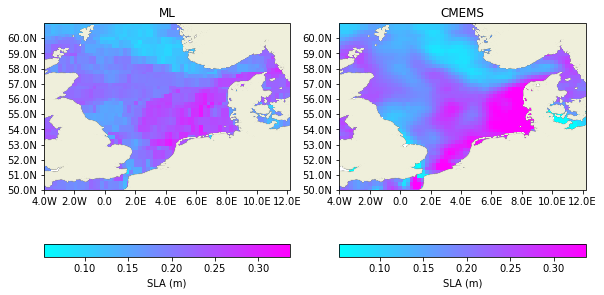

In [194]:
# Single Plot

fig = plt.figure(figsize = (15, 10))

#chosen_date='2004-05-13 15:00:00'
chosen_day='2021-10-24'

alti_20_ML=alti_ML.loc[chosen_day:chosen_day] #- np.nanmean(alti_20_ML.sla_predicted)

alti_20_ML


#alti_20_ML = alti_ML.loc[alti_ML['time']==chosen_day]
#alti_20_ML = alti_20_ML.set_index(alti_20_ML.times)
min_sl=np.nanmean(alti_20_ML.sla_predicted)-3*np.nanstd(alti_20_ML.sla_predicted)
max_sl=np.nanmean(alti_20_ML.sla_predicted)+3*np.nanstd(alti_20_ML.sla_predicted)


single_plot(alti_20_ML,min_sl,max_sl,1,fig,'ML')

alti_20_cmems=alti_cmems.loc[chosen_day:chosen_day] #- np.nanmean(alti_cmems.sla_predicted)
#alti_20_cmems=alti_20_cmems.groupby([pd.Grouper('lon'),pd.Grouper('lat')]).mean()
#alti_20_cmems['lat'] = alti_20_cmems.index.get_level_values('lat')
#alti_20_cmems['lon'] = alti_20_cmems.index.get_level_values('lon')
#min_sl=np.nanmean(alti_20_cmems.sla_predicted)-3*np.nanstd(alti_20_cmems.sla_predicted)
#max_sl=np.nanmean(alti_20_cmems.sla_predicted)+3*np.nanstd(alti_20_cmems.sla_predicted)


single_plot(alti_20_cmems,min_sl,max_sl,2,fig,'CMEMS')



# alti_20_Copernicus=alti_Copernicus.loc[chosen_day:chosen_day] #- np.nanmean(alti_Copernicus.sla_predicted)
# min_sl=np.nanmean(alti_20_Copernicus.sla_predicted)-np.nanstd(alti_20_Copernicus.sla_predicted)
# max_sl=np.nanmean(alti_20_Copernicus.sla_predicted)+np.nanstd(alti_20_Copernicus.sla_predicted)

# single_plot(alti_20_Copernicus,min_sl,max_sl,3,fig)

#fig.savefig("fig_dailymapsexample.png")

/home/passaro/anaconda3/envs/machine_learning_altimetry_validation/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


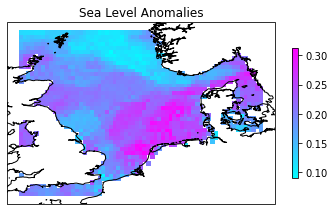

In [195]:
# Conversion into a regular grid as xarray dataset (and attempt to smooth it)

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from scipy.signal import convolve2d

# Create a new variable called 'time' with a constant value of '2021-10-24'
alti_20_ML['time'] = pd.Timestamp('2021-10-24')

# Convert pandas dataframe to xarray dataset
ds = alti_20_ML.set_index(['time', 'lat', 'lon']).to_xarray()

# Reshape the dataset into 2D lat-lon grids
#ds = ds.unstack('lat').transpose('lon', 'lat', 'time')


# Plot sla_predicted in a lat-lon map
max_lat = 61.0
min_lat = 50.0
max_lon = 12.2
min_lon = -4.0
    
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Set up the PlateCarree projection and create a figure and axis
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw={'projection': proj})

# Add the pcolormesh plot of sla_predicted
mesh = ax.pcolormesh(ds.lon, ds.lat, ds.sla_predicted[0], transform=ccrs.PlateCarree(), cmap='cool', alpha=1)

# Add the coastlines with a higher resolution
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='none')
ax.add_feature(land, edgecolor='black')

# Add a colorbar
cbar = plt.colorbar(mesh, ax=ax, shrink=0.6)

# Set the title
ax.set_title('Sea Level Anomalies')

# Show the plot
plt.show()



In [196]:
from scipy.ndimage.filters import gaussian_filter
import scipy.interpolate as interp

# Extract the numpy array from the xarray dataset
sla_predicted = ds.sla_predicted.values[0]


# Interpolate missing values using griddata
lons, lats = np.meshgrid(ds.lon, ds.lat)
grid_points = np.column_stack((lons.ravel(), lats.ravel()))
sla = ds['sla_predicted'].values[0].ravel()
sla_interp = interp.griddata(grid_points[~np.isnan(sla)], sla[~np.isnan(sla)],
                             grid_points, method='linear').reshape(lons.shape)

sla_interp[np.isnan(sla_interp)] = 0

# Create a mask for the NaN values
mask = np.isnan(sla_predicted)


# Smooth the padded array using a 2D Gaussian filter with sigma=0.8
sla_predicted_smooth = gaussian_filter(sla_interp, sigma=0.8, mode='nearest')


# Apply the mask to set NaN values to 0 in the smoothed array
sla_predicted_smooth[mask] = np.nan


# Replace the original array in the xarray dataset with the smoothed array
ds['sla_predicted_smoothed'] = (('time', 'lat', 'lon'), sla_predicted_smooth.reshape(1, 44, 65))

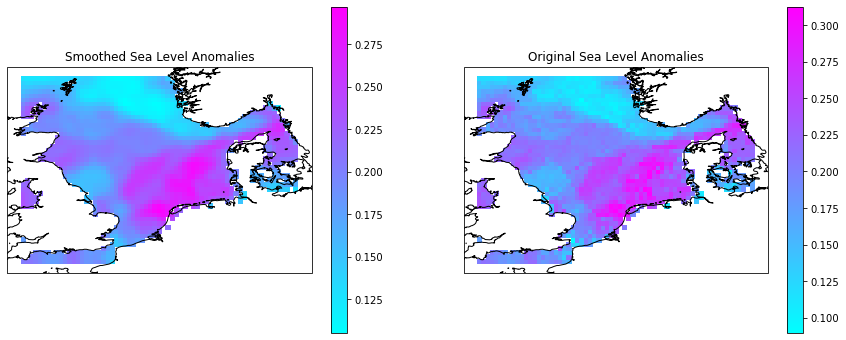

In [197]:
# Plot sla_predicted in a lat-lon map
max_lat = 61.0
min_lat = 50.0
max_lon = 12.2
min_lon = -4.0
    
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Set up the PlateCarree projection and create a figure and axes
proj = ccrs.PlateCarree()
fig, (ax1, ax2) = plt.subplots(ncols=2, subplot_kw={'projection': proj}, figsize=(15, 10))

# Add the pcolormesh plot of sla_predicted_smoothed to the first axis
mesh1 = ax1.pcolormesh(ds.lon, ds.lat, ds.sla_predicted_smoothed[0], transform=ccrs.PlateCarree(), cmap='cool', alpha=1)
# Add the coastlines with a higher resolution
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='none')
ax1.add_feature(land, edgecolor='black')
# Add a colorbar
cbar1 = plt.colorbar(mesh1, ax=ax1, shrink=0.6)
# Set the title
ax1.set_title('Smoothed Sea Level Anomalies')

# Add the pcolormesh plot of sla_predicted to the second axis
mesh2 = ax2.pcolormesh(ds.lon, ds.lat, ds.sla_predicted[0], transform=ccrs.PlateCarree(), cmap='cool', alpha=1)
# Add the coastlines with a higher resolution
land = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='none')
ax2.add_feature(land, edgecolor='black')
# Add a colorbar
cbar2 = plt.colorbar(mesh2, ax=ax2, shrink=0.6)
# Set the title
ax2.set_title('Original Sea Level Anomalies')

# Show the plot
plt.show()



In [205]:
#Transform ds into the previous pandas dataframe called alti_20_ML with time as index, and times lat lon sla_predicted and sla_predicted_smooth as variables
alti_20_ML

,times,lat,lon,sla_predicted,time
time,,,,,
2021-10-24,1033976,60.875,5.375,NaN,2021-10-24
2021-10-24,628826,56.625,4.125,0.212420,2021-10-24
2021-10-24,747451,57.875,4.125,0.192034,2021-10-24
2021-10-24,747086,57.875,3.875,0.198536,2021-10-24
2021-10-24,746721,57.875,3.625,0.201752,2021-10-24
...,...,...,...,...,...
2021-10-24,494871,55.125,9.875,0.154570,2021-10-24
2021-10-24,494506,55.125,9.625,0.163862,2021-10-24
2021-10-24,493046,55.125,8.625,0.165482,2021-10-24


In [208]:
# Convert xarray dataset to pandas dataframe
df = ds.to_dataframe()

# Reset index to make time a variable
df.reset_index(inplace=True)

# Rename columns to match required names
alti_20_ML_new = df.rename(columns={'sla_predicted': 'sla_predicted', 'sla_predicted_smoothed': 'sla_predicted_smooth', 'lat': 'latitude', 'lon': 'longitude', 'times': 'times', 'time': 'time'}).loc[:, ['times', 'latitude', 'longitude', 'sla_predicted', 'sla_predicted_smooth', 'time']]
alti_20_ML_new = alti_20_ML_new.rename(columns={'latitude': 'lat', 'longitude': 'lon'})
alti_20_ML_new = alti_20_ML_new.set_index('time')
# Remove rows with NaN values in sla_predicted
alti_20_ML_new = alti_20_ML_new.dropna(subset=['sla_predicted'], how='any')

alti_20_ML_new

,times,lat,lon,sla_predicted,sla_predicted_smooth
time,,,,,
2021-10-24,296.0,50.125,-3.875,0.201776,0.202686
2021-10-24,661.0,50.125,-3.625,0.214174,0.206862
2021-10-24,1026.0,50.125,-3.375,0.209238,0.206358
2021-10-24,1391.0,50.125,-3.125,0.204878,0.201975
2021-10-24,1756.0,50.125,-2.875,0.200244,0.195171
...,...,...,...,...,...
2021-10-24,1031421.0,60.875,3.625,0.139698,0.142768
2021-10-24,1031786.0,60.875,3.875,0.140752,0.147476
2021-10-24,1032151.0,60.875,4.125,0.147828,0.156951


In [202]:
ds

<xarray.Dataset>
Dimensions:                 (lat: 44, lon: 65, time: 1)
Coordinates:
  * time                    (time) datetime64[ns] 2021-10-24
  * lat                     (lat) float64 50.12 50.38 50.62 ... 60.62 60.88
  * lon                     (lon) float64 -3.875 -3.625 -3.375 ... 11.88 12.12
Data variables:
    times                   (time, lat, lon) float64 296.0 661.0 ... nan nan
    sla_predicted           (time, lat, lon) float64 0.2018 0.2142 ... nan nan
    sla_predicted_smoothed  (time, lat, lon) float64 0.2027 0.2069 ... nan nan